In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
tweet_df = pd.read_csv(r'D:\MACHINE LEARNING\Mentorship program\NLP Projects\NLP_Project_first\tweet_data.csv')

In [3]:
tweet_df.head()

,tweetID,crDate,edInput,editor,engages,isApproved,isEdNeed,isRT,likes,photoUrl,retweets,rtUsID,text,topicName,usFlwrs,usID,usName,videoUrl
0,1070867471245164544,2018-12-07 02:27:55,-1,-1,98,False,True,False,64,https://pbs.twimg.com/media/Dtx8SiIWkAImVsb.jpg,34,-1,The immediate impulse for an alliance of the E...,Business,23464532,5988062,The Economist,NaN
1,1070868017888837633,2018-12-07 02:30:05,-1,-1,13,False,True,False,10,https://pbs.twimg.com/media/Dtx8yTyW4AEciqP.jpg,3,-1,America's economy is flashing some warning sig...,Business,1732809,16184358,CNN Business,NaN
2,1070868012864028673,2018-12-07 02:30:04,-1,-1,12,False,True,False,8,NaN,4,-1,Lyft files for what is expected to be one of t...,Business,2253989,25053299,FORTUNE,NaN
3,1070867995239555075,2018-12-07 02:30:00,-1,-1,5,False,True,False,4,NaN,1,-1,"Exporters still waiting to get Rs 6,000 crore ...",Business,1704056,43855487,Business Standard,NaN
4,1070867995205885952,2018-12-07 02:30:00,-1,-1,5,False,True,False,2,NaN,3,-1,Ride-hailing firm Lyft races to leave Uber beh...,Business,1997662,15110357,Reuters Business,https://video.twimg.com/amplify_video/10708116...


In [4]:
tweet_df['edInput'].value_counts()

-1    422665
 1    215577
 2    106741
 4     32733
 3      8200
Name: edInput, dtype: int64

In [5]:
tweet_df['topicName'].value_counts()

Business                    164602
News                        131973
Motivational                 84750
Technology                   47679
Design & Architecture        44987
Cryptocurrency               38623
Art                          36697
Interesting                  28615
Animal                       28202
Memes                        26349
Nature                       25021
Photography                  23638
DIY & Craft                  22392
Space                        14226
Funny                        13654
Travel                       13215
Random                       11825
Editorial Pics               11026
Flowers                       9450
Mindfulness                   2779
Fitness                       2454
Nanotech                       792
World Leaders                  663
Psychology                     544
US News                        279
science                        244
Stocks                         188
Humor                          154
Spirituality        

In [6]:
tweet_df=tweet_df[tweet_df['topicName']=='Technology']
tweet_df.columns

Index(['tweetID', 'crDate', 'edInput', 'editor', 'engages', 'isApproved',
       'isEdNeed', 'isRT', 'likes', 'photoUrl', 'retweets', 'rtUsID', 'text',
       'topicName', 'usFlwrs', 'usID', 'usName', 'videoUrl'],
      dtype='object')

In [7]:
tweet_df=tweet_df[['text','edInput']]

In [8]:
tweet_df['edInput'].value_counts()

-1    22235
 1    14652
 2     4965
 4     4761
 3     1066
Name: edInput, dtype: int64

In [9]:
tweet_df=tweet_df[(tweet_df['edInput'] != -1) & (tweet_df['edInput'] != 3) & (tweet_df['edInput'] != 4)]

In [10]:
tweet_df['text']=tweet_df['text'].str.split('https',1).str[0]

In [11]:
tweet_df.reset_index(drop=True)

,text,edInput
0,This paper Boeing 777 puts all other paper air...,1
1,This long-range wireless charging system charg...,1
2,Elon Musk has created and sold multiple compan...,1
3,Honda's $4.9 million private jet is an absolut...,1
4,The US Marines pieced together this temporary ...,1
...,...,...
19612,"Tomorrow on @cheddar, my exclusive interview w...",2
19613,Netflix documentary The Great Hack turns the C...,2
19614,Hulu is developing a Hitchhiker’s Guide to the...,1
19615,This machine folds dumplings super fast.,1


In [12]:
# tweet_df['text'].iloc[19615]

In [13]:
tweet_df.isnull().sum()

text       0
edInput    0
dtype: int64

In [14]:
tweet_df['text'].str.isspace().sum()

0

In [15]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19617 entries, 60071 to 785452
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   text     19617 non-null  object
 1   edInput  19617 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 459.8+ KB


In [16]:
#Check for data imbalancement
tweet_df['edInput'].value_counts()

1    14652
2     4965
Name: edInput, dtype: int64

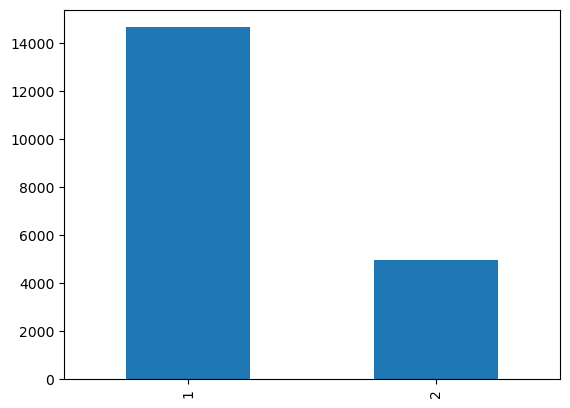

In [17]:
tweet_df['edInput'].value_counts().plot(kind='bar')
plt.show()

In [18]:
y = tweet_df['edInput']
X = tweet_df['text']

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(TfidfVectorizer(stop_words='english'),
LogisticRegression(max_iter=1000))
param_grid = {'logisticregression__C': [0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(X_train, y_train)
grid_preds=grid.predict(X_test)
print("Best cross-validation score:{:.2f}".format(grid.best_score_))
print("Best parameters:{}".format(grid.best_params_))
print("Model score:{:.2f}".format(grid.score(X_test,y_test)))

Best cross-validation score:0.83
Best parameters:{'logisticregression__C': 10}
Model score:0.82


In [22]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix

In [23]:
confusion_matrix(y_test,grid_preds)

array([[2673,  252],
       [ 450,  549]], dtype=int64)

C:\Users\Priyambada\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


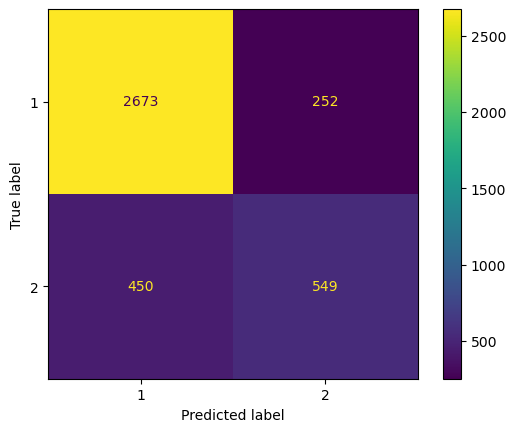

In [24]:
plot_confusion_matrix(grid,X_test,y_test);

In [25]:
print(classification_report(y_test,grid_preds))

              precision    recall  f1-score   support

           1       0.86      0.91      0.88      2925
           2       0.69      0.55      0.61       999

    accuracy                           0.82      3924
   macro avg       0.77      0.73      0.75      3924
weighted avg       0.81      0.82      0.81      3924



In [26]:
from sklearn.svm import SVC
pipe = make_pipeline(TfidfVectorizer(),SVC())
param_grid = {'svc__C':np.logspace(-3,2,6),'svc__kernel':['linear','rbf'], 'svc__gamma':['scale','auto']}
grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(X_train, y_train)
grid_preds=grid.predict(X_test)
print("Best cross-validation score:{:.2f}".format(grid.best_score_))
print("Best parameters:{}".format(grid.best_params_))
print("Model score:{:.2f}".format(grid.score(X_test,y_test)))

Best cross-validation score:0.83
Best parameters:{'svc__C': 10.0, 'svc__gamma': 'scale', 'svc__kernel': 'rbf'}
Model score:0.83


In [27]:
confusion_matrix(y_test,grid_preds)

array([[2703,  222],
       [ 432,  567]], dtype=int64)

C:\Users\Priyambada\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


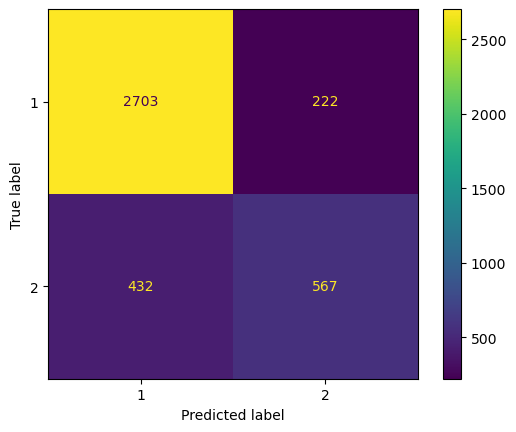

In [28]:
plot_confusion_matrix(grid,X_test,y_test);

In [29]:
print(classification_report(y_test,grid_preds))

              precision    recall  f1-score   support

           1       0.86      0.92      0.89      2925
           2       0.72      0.57      0.63       999

    accuracy                           0.83      3924
   macro avg       0.79      0.75      0.76      3924
weighted avg       0.83      0.83      0.83      3924



In [30]:
from sklearn.naive_bayes import MultinomialNB
pipe = make_pipeline(TfidfVectorizer(stop_words='english'),
MultinomialNB())
pipe.fit(X_train, y_train)
pipe_preds=pipe.predict(X_test)
print("Model score:{:.2f}".format(pipe.score(X_test,y_test)))

Model score:0.82


In [31]:
confusion_matrix(y_test,pipe_preds)

array([[2841,   84],
       [ 620,  379]], dtype=int64)

C:\Users\Priyambada\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


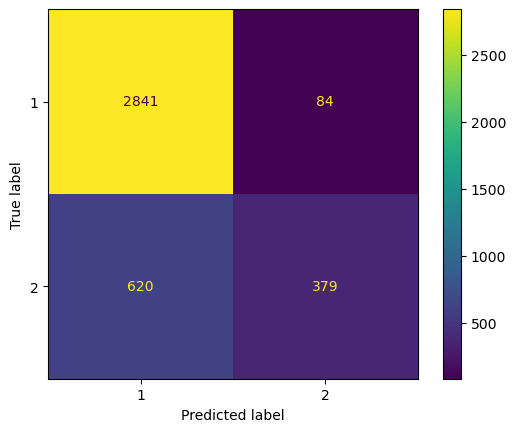

In [32]:
plot_confusion_matrix(pipe,X_test,y_test);

In [33]:
print(classification_report(y_test,pipe_preds))

              precision    recall  f1-score   support

           1       0.82      0.97      0.89      2925
           2       0.82      0.38      0.52       999

    accuracy                           0.82      3924
   macro avg       0.82      0.68      0.70      3924
weighted avg       0.82      0.82      0.80      3924



In [34]:
pipe = make_pipeline(TfidfVectorizer(stop_words='english'),
MultinomialNB())
param_grid = {'multinomialnb__alpha': (1, 0.1, 0.01, 0.001, 0.0001, 0.00001)}
grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(X_train, y_train)
grid_preds=grid.predict(X_test)
print("Best cross-validation score:{:.2f}".format(grid.best_score_))
print("Best parameters:{}".format(grid.best_params_))
print("Model score:{:.2f}".format(grid.score(X_test,y_test)))

Best cross-validation score:0.83
Best parameters:{'multinomialnb__alpha': 0.1}
Model score:0.83


In [35]:
print(classification_report(y_test,grid_preds))

              precision    recall  f1-score   support

           1       0.87      0.91      0.89      2925
           2       0.70      0.61      0.65       999

    accuracy                           0.83      3924
   macro avg       0.79      0.76      0.77      3924
weighted avg       0.83      0.83      0.83      3924



In [36]:
pipe = make_pipeline(TfidfVectorizer(stop_words='english'), LogisticRegression(max_iter=1000))
# running the grid search takes a long time because of the
# relatively large grid and the inclusion of trigrams
param_grid = {"logisticregression__C": [0.001, 0.01, 0.1, 1, 10, 100],
"tfidfvectorizer__ngram_range": [(1, 1), (1, 2), (1, 3)]}
grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(X_train, y_train)
grid_preds=grid.predict(X_test)
print("Best cross-validation score:{:.2f}".format(grid.best_score_))
print("Best parameters:{}".format(grid.best_params_))
print("Model score:{:.2f}".format(grid.score(X_test,y_test)))

Best cross-validation score:0.84
Best parameters:{'logisticregression__C': 100, 'tfidfvectorizer__ngram_range': (1, 3)}
Model score:0.84


In [37]:
print(classification_report(y_test,grid_preds))

              precision    recall  f1-score   support

           1       0.87      0.92      0.89      2925
           2       0.71      0.59      0.64       999

    accuracy                           0.84      3924
   macro avg       0.79      0.75      0.77      3924
weighted avg       0.83      0.84      0.83      3924

